In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the uploaded CSV file to inspect its contents
file_path = '../data/raw/alzheimers_disease_data.csv'
df= pd.read_csv(file_path)
df.head(5)

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


In [ ]:
from ydata_profiling import ProfileReport

# Crear el perfil del dataset
profile = ProfileReport(df, title="EDA Report - Alzheimer's Dataset", explorative=True)

# Guardar el informe en un archivo HTML
profile.to_file("eda_report_alzheimers.html")

# Mostrar el informe directamente en el notebook (si usas Jupyter)
# profile.to_notebook_iframe()


In [3]:
# Display general information and the first few rows of the dataset
df_info = df.info()
df_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2149 entries, 0 to 2148
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   PatientID                  2149 non-null   int64  
 1   Age                        2149 non-null   int64  
 2   Gender                     2149 non-null   int64  
 3   Ethnicity                  2149 non-null   int64  
 4   EducationLevel             2149 non-null   int64  
 5   BMI                        2149 non-null   float64
 6   Smoking                    2149 non-null   int64  
 7   AlcoholConsumption         2149 non-null   float64
 8   PhysicalActivity           2149 non-null   float64
 9   DietQuality                2149 non-null   float64
 10  SleepQuality               2149 non-null   float64
 11  FamilyHistoryAlzheimers    2149 non-null   int64  
 12  CardiovascularDisease      2149 non-null   int64  
 13  Diabetes                   2149 non-null   int64

#### **Análisis Preliminar del Dataset**

##### Información General
- Número de Filas: 2149
- Número de Columnas: 35
- Tipos de Datos:
- Enteros (int64): 22 columnas
- Flotantes (float64): 12 columnas
- Cadenas de texto (object): 1 columna (DoctorInCharge)

##### Columnas Relevantes
- Datos demográficos:
Age, Gender, Ethnicity, EducationLevel
- Estilo de vida:
BMI, Smoking, AlcoholConsumption, PhysicalActivity, DietQuality, SleepQuality
- Historial médico:
FamilyHistoryAlzheimers, CardiovascularDisease, Diabetes, Depression, HeadInjury, Hypertension
- Mediciones clínicas:
Presión arterial (SystolicBP, DiastolicBP), colesterol (CholesterolTotal, CholesterolLDL, etc.)
- Evaluaciones cognitivas y funcionales:
MMSE, FunctionalAssessment, ADL
- Síntomas:
MemoryComplaints, BehavioralProblems, Confusion, etc.
- Diagnóstico:
Diagnosis (variable objetivo)
- Metadata:
PatientID, DoctorInCharge (pueden no ser útiles para análisis).

In [4]:
# Eliminar del dataset las variables no relevantes PatientID y DoctorInCharge
df = df.drop(columns=['PatientID', 'DoctorInCharge'])
df.head(2)

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,9.025679,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,7.151293,...,7.118696,0,0,2.592424,0,0,0,0,1,0


Valores faltantes

In [5]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfulness                0
Diagnosi

Valores únicos 

In [6]:
df.nunique()

Age                            31
Gender                          2
Ethnicity                       4
EducationLevel                  4
BMI                          2149
Smoking                         2
AlcoholConsumption           2149
PhysicalActivity             2149
DietQuality                  2149
SleepQuality                 2149
FamilyHistoryAlzheimers         2
CardiovascularDisease           2
Diabetes                        2
Depression                      2
HeadInjury                      2
Hypertension                    2
SystolicBP                     90
DiastolicBP                    60
CholesterolTotal             2149
CholesterolLDL               2149
CholesterolHDL               2149
CholesterolTriglycerides     2149
MMSE                         2149
FunctionalAssessment         2149
MemoryComplaints                2
BehavioralProblems              2
ADL                          2149
Confusion                       2
Disorientation                  2
PersonalityCha

Valores duplicados

In [7]:
df.duplicated().sum()

np.int64(0)

Estadísticas Descriptivas

In [8]:
# Summary statistics for numerical columns
summary_stats = df.describe().T
print(summary_stats)

                            count        mean         std         min  \
Age                        2149.0   74.908795    8.990221   60.000000   
Gender                     2149.0    0.506282    0.500077    0.000000   
Ethnicity                  2149.0    0.697534    0.996128    0.000000   
EducationLevel             2149.0    1.286645    0.904527    0.000000   
BMI                        2149.0   27.655697    7.217438   15.008851   
Smoking                    2149.0    0.288506    0.453173    0.000000   
AlcoholConsumption         2149.0   10.039442    5.757910    0.002003   
PhysicalActivity           2149.0    4.920202    2.857191    0.003616   
DietQuality                2149.0    4.993138    2.909055    0.009385   
SleepQuality               2149.0    7.051081    1.763573    4.002629   
FamilyHistoryAlzheimers    2149.0    0.252210    0.434382    0.000000   
CardiovascularDisease      2149.0    0.144253    0.351428    0.000000   
Diabetes                   2149.0    0.150768    0.

- ID de paciente: los ID de pacientes oscilan entre 4751 y 6900.
- Edad: Los pacientes tienen edades comprendidas entre 60 y 90 años, con una media de 75 años.
- Género: Distribución casi igual entre hombres y mujeres.
- Etnia: la mayoría de los pacientes son caucásicos, con algunos afroamericanos, asiáticos y otras etnias.
- Nivel de educación: la mayoría de los pacientes tienen un título de escuela secundaria o licenciatura.
- IMC: Va de 15 a 40, con una media de 27,7.
- Tabaquismo y consumo de alcohol: alrededor del 29% fuma; El consumo de alcohol es en promedio de 10 unidades por semana.
- Actividad física y calidad de la dieta: los pacientes realizan un promedio de aproximadamente 5 horas de actividad y una puntuación de calidad de la dieta de 5.
- SleepQuality: la puntuación media de la calidad del sueño es 7.
- Historial médico: antecedentes familiares de Alzheimer (~25%), enfermedad cardiovascular (~14%), diabetes (~15%), depresión (~20%), lesión en la cabeza (~9%), hipertensión (~15%).
- Presión arterial y colesterol: la presión arterial sistólica promedio es de 134 mmHg, la presión arterial diastólica es de 90 mmHg y el colesterol total es de 225 mg/dL.
- Evaluaciones cognitivas/funcionales: el promedio del MMSE es 15; La evaluación funcional promedia 5.
- Síntomas: Se reportan confusión (~20%), quejas de memoria (~21%) y olvidos (~30%).
- Diagnóstico: Alrededor del 35% de los pacientes son diagnosticados con Alzheimer.

#### Análisis por Diagnóstico

Aquí se analiza la variable objetivo (diagnóstico) con el resto de variables

In [9]:
# Group by 'Diagnosis' and get the mean for all columns
mean_stats = df.groupby('Diagnosis').mean()

# Display result
mean_stats.to_csv("../data/processed/stats-by-diagnosis.csv")

NOTA:
Como hay muchas columnas =, exporté información agrupada a un archivo csv para verificarlas y analizarlas mejor.

In [10]:
df.groupby('Diagnosis').agg(['mean']).T

,Diagnosis,0,1
Age,mean,74.945284,74.842105
Gender,mean,0.514039,0.492105
Ethnicity,mean,0.708423,0.677632
EducationLevel,mean,1.316055,1.232895
BMI,mean,27.515092,27.912670
Smoking,mean,0.290137,0.285526
AlcoholConsumption,mean,10.071880,9.980156
PhysicalActivity,mean,4.907640,4.943160
DietQuality,mean,4.974839,5.026581
SleepQuality,mean,7.124832,6.916292


#### EDA

Separar variables categóricas y numéricas

In [27]:
# Identificar características numéricas: 
numerical_columns = [col for col in df.columns if df[col].nunique() > 5]

# Identificar características categóricas: características que no son numéricas y no son de 'Diagnóstico'
categorical_columns = df.columns.difference(numerical_columns).difference(["Diagnosis"]).to_list()

print("Variables Numéricas:", len(numerical_columns))
print("Variables Categóricas:", len(categorical_columns))

Variables Numéricas: 15
Variables Categóricas: 17


Visualización variables numéricas

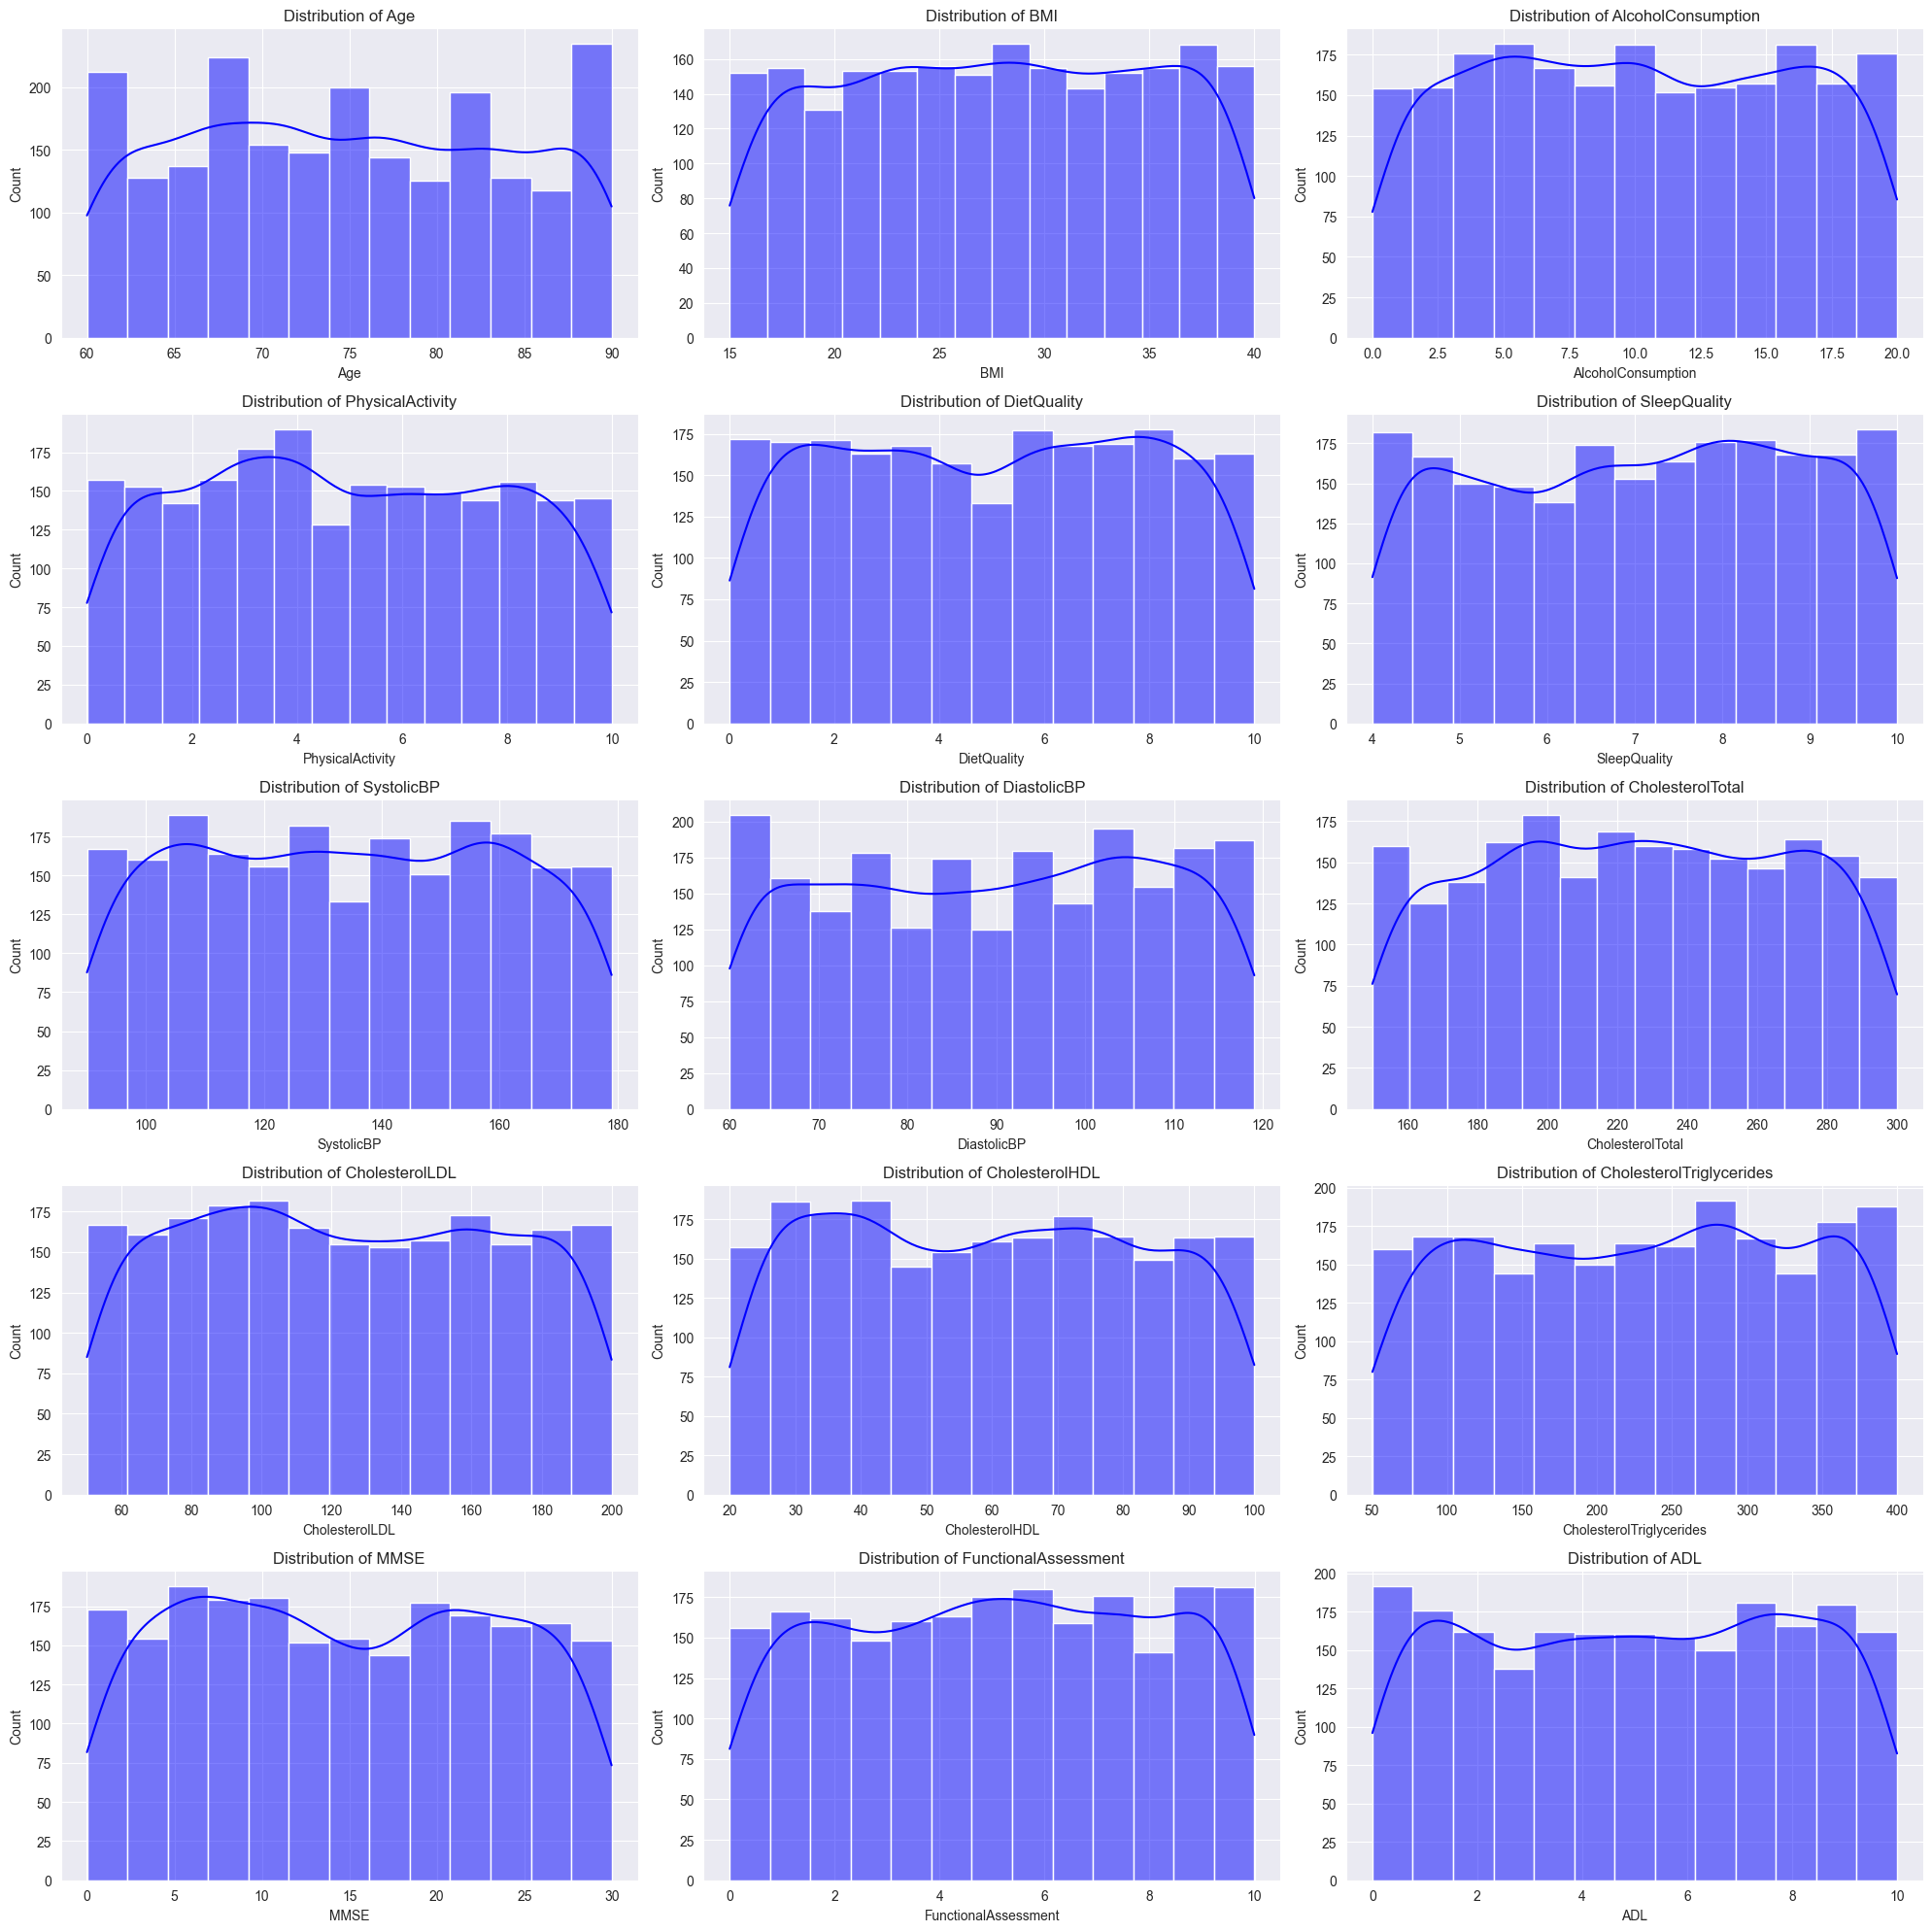

<Figure size 640x480 with 0 Axes>

In [28]:
# Plot distributions for numerical columns
#numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(len(numerical_columns)//3, 3, figsize=(20, 20))
axes = axes.flatten()

for i, col in enumerate(numerical_columns):
    sns.histplot(df[col], kde=True, ax=axes[i], color='blue')
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()
plt.savefig('histplot.png')

Análisis de Outliers en las variables numéricas

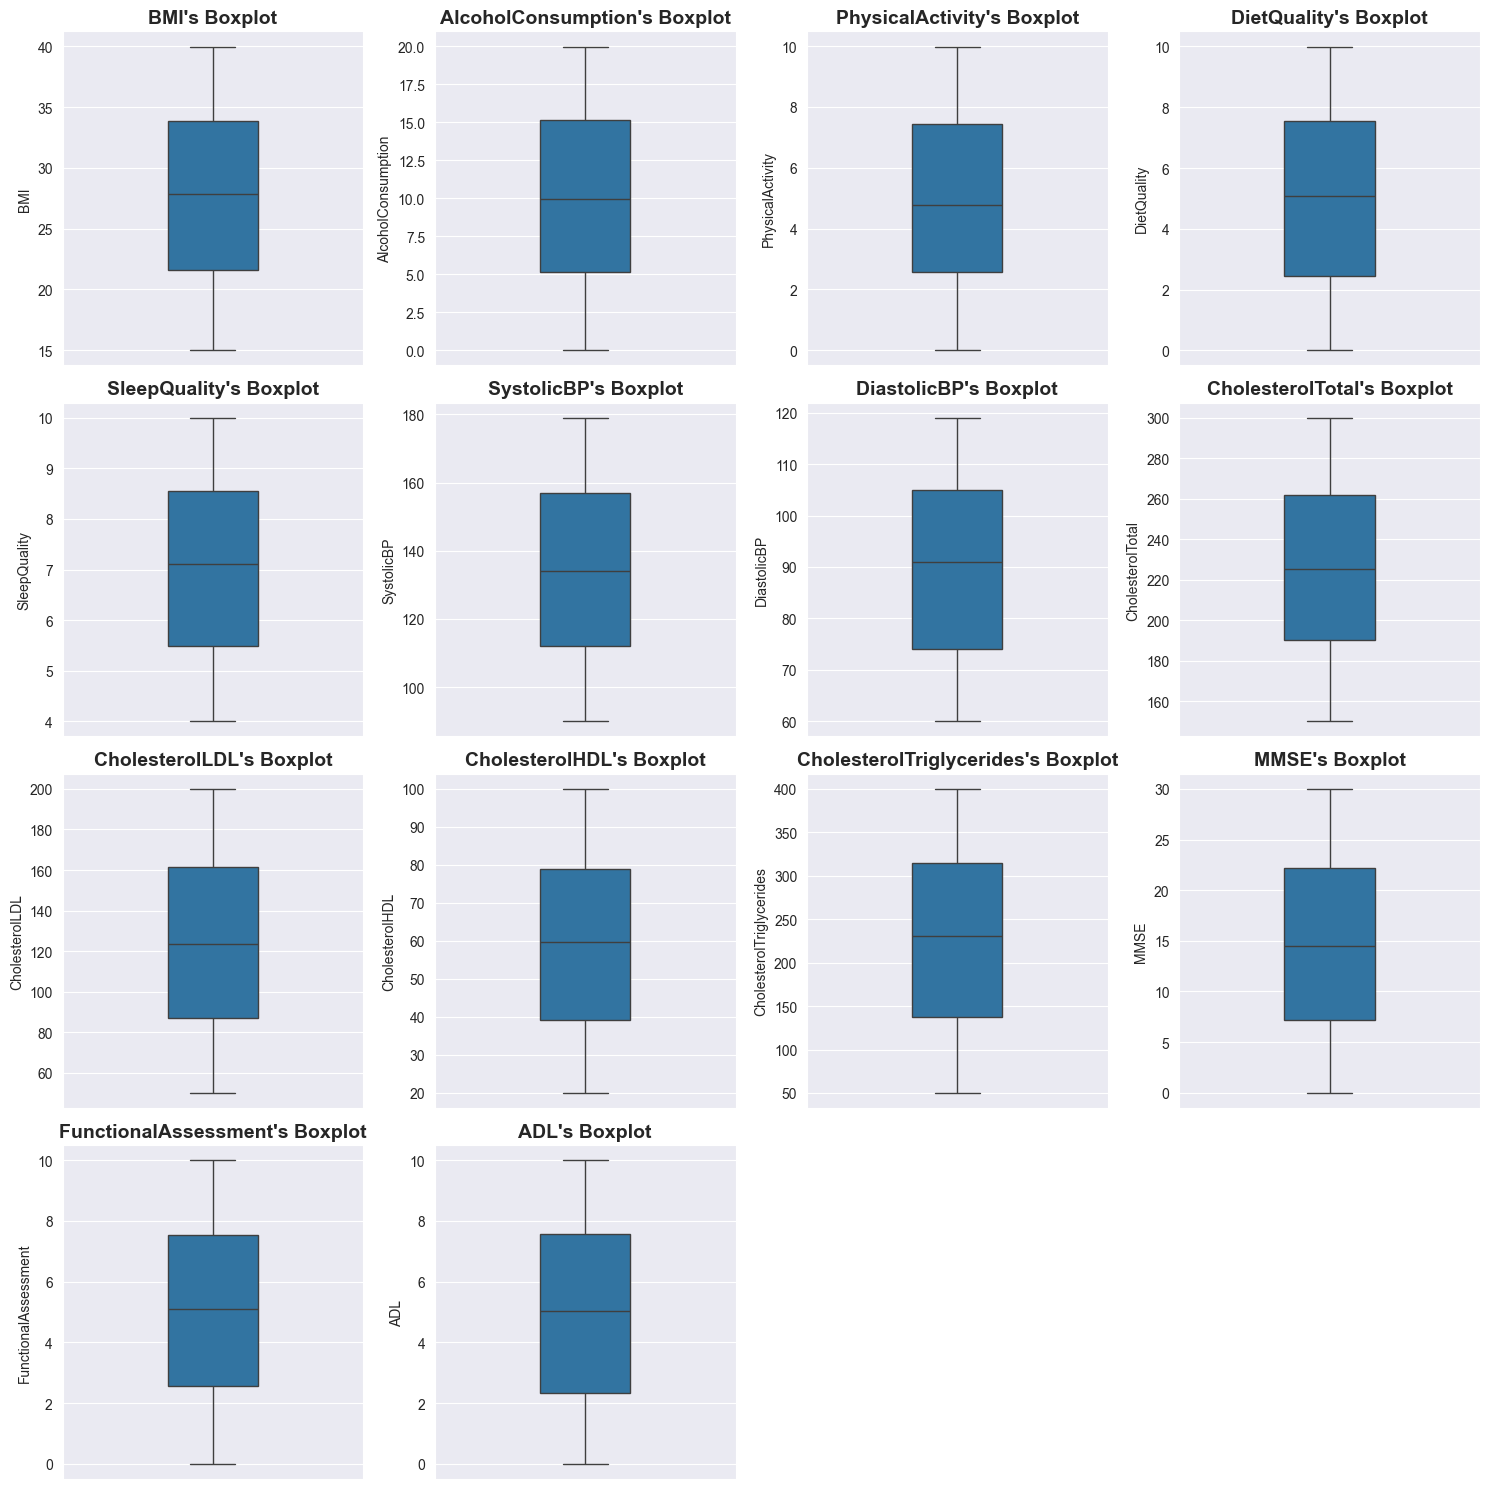

<Figure size 640x480 with 0 Axes>

In [30]:
plt.figure(figsize=(15, 15))
sns.set_style('darkgrid')
for i, var in enumerate(numerical_columns[1:], 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data= df,
                y=var,
                width=0.3)
    plt.title(f"{var}'s Boxplot",
            fontsize=14,
            weight="bold")
plt.tight_layout()
plt.show()
plt.savefig('boxplot.png')

Distribución de la variable objetivo

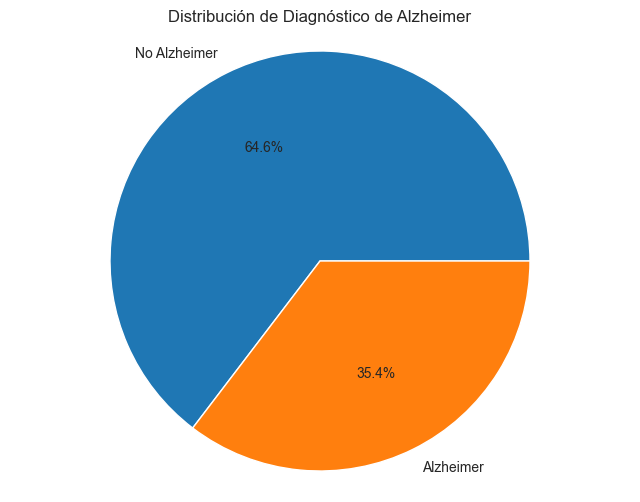

In [31]:
# Distribución de la variable objetivo
diagnosis_counts = df['Diagnosis'].value_counts()

fig, ax = plt.subplots(figsize=(8, 6))
ax.pie(diagnosis_counts, labels=['No Alzheimer', 'Alzheimer'], autopct='%1.1f%%')
ax.set_title('Distribución de Diagnóstico de Alzheimer')
plt.axis('equal')
plt.show()

El valor objetivo está moderadamente desequilibrado: ~65 % de las instancias son 0 y ~35 % son 1.
Esto confirma nuestra observación anterior en los diagramas de recuento de distribución de características categóricas de que los datos están muy sesgados hacia personas sin enfermedad de Alzheimer.
Profundicemos en 'Edad', 'Género', 'Etnia' y 'Nivel educativo' para comprender mejor los efectos de la EA...
Y para verificar si nuestra hipótesis (indicada en README.MD) es cierta. ¿El nivel educativo tiene algún efecto sobre la EA?

Distribución de la variable objetivo (diagnóstico) con cada una de las variable categóricas



C:\Users\Administrator\AppData\Local\Temp\ipykernel_19064\216154624.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(df.groupby('bins').size(), labels=df.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19064\216154624.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  axs[0, 0].pie(df.groupby('bins').size(), labels=df.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)


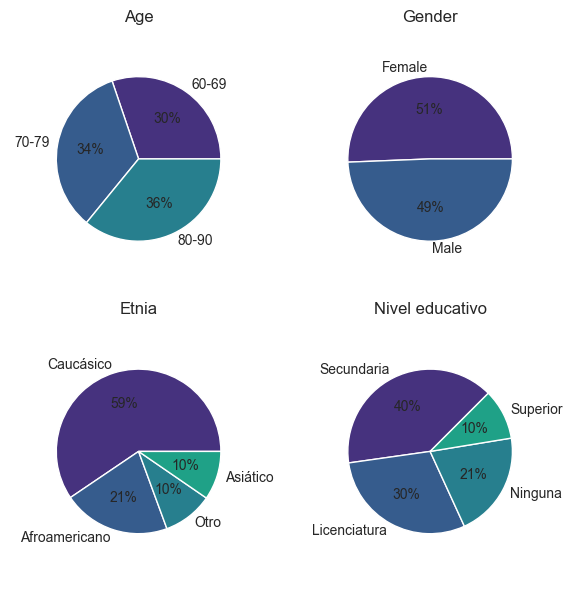

In [37]:
# Definir paleta de colores
colors = sns.color_palette('viridis')[0:5]

# Crear subplot con 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(6, 6))

# Distribución por edad
df['bins'] = pd.cut(df['Age'], bins=[60, 69, 79, 90], labels=["60-69", "70-79", "80-90"])
axs[0, 0].pie(df.groupby('bins').size(), labels=df.groupby('bins').size().index, colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 0].set_title("Age")

# Distribución por género
axs[0, 1].pie(df['Gender'].value_counts(), labels=['Female', 'Male'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[0, 1].set_title("Gender")

# Distribución por etnia
axs[1, 0].pie(df['Ethnicity'].value_counts(), labels=['Caucásico', 'Afroamericano', 'Otro', 'Asiático'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 0].set_title("Etnia")

# Distribución por nivel educativo
axs[1, 1].pie(df['EducationLevel'].value_counts(), startangle=45, labels=['Secundaria', "Licenciatura", 'Ninguna', 'Superior'], colors=colors, autopct='%.0f%%',radius=0.8)
axs[1, 1].set_title("Nivel educativo")

# Eliminar la columna 'bins' de los datos
df.drop(['bins'], axis=1, inplace=True)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [39]:
def create_diagnosis_dataframe(column_name, index_mapping):
    total = df[column_name].value_counts().sort_index()
    total.name='Total'
    diagnosis1 = df.groupby(column_name)['Diagnosis'].sum()
    percentage = diagnosis1 / total * 100
    percentage.name = 'Diagnosis, %'
    
    df_diag = pd.concat([total, diagnosis1, percentage], axis=1)
    df_diag['Total, %'] = 100  
    df_diag.index = index_mapping
    return df_diag
    

print("Education Level DataFrame:")
df_educ=create_diagnosis_dataframe('EducationLevel', ['None', 'Highschool', "Bachelor's", 'Higher'])
print(df_educ,'\n')

print("Ethnicity DataFrame:")
df_ethn=create_diagnosis_dataframe('Ethnicity', ['Caucasian', 'African-American', 'Asian', 'Other'])
print(df_ethn,'\n')

print("Family History of Alzheimer's DataFrame:")
df_famh=create_diagnosis_dataframe('FamilyHistoryAlzheimers', ['Yes', 'No'])
print(df_famh,'\n')


Education Level DataFrame:
            Total  Diagnosis  Diagnosis, %  Total, %
None          446        174     39.013453       100
Highschool    854        302     35.362998       100
Bachelor's    636        217     34.119497       100
Higher        213         67     31.455399       100 

Ethnicity DataFrame:
                  Total  Diagnosis  Diagnosis, %  Total, %
Caucasian          1278        463     36.228482       100
African-American    454        146     32.158590       100
Asian               206         84     40.776699       100
Other               211         67     31.753555       100 

Family History of Alzheimer's DataFrame:
     Total  Diagnosis  Diagnosis, %  Total, %
Yes   1607        583     36.278780       100
No     542        177     32.656827       100 



C:\Users\Administrator\AppData\Local\Temp\ipykernel_19064\3114776788.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Total, %', data=df, color='green', label='Diagnosis=0', ax=ax, ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19064\3114776788.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19064\3114776788.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.index, y='Total, %', data=df, color='green', label='Diagnosis=0', ax=ax, ci=None)
C:\Users\Administrator\AppData\Local\Temp\ipykernel_19064\3114776788.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=df.inde

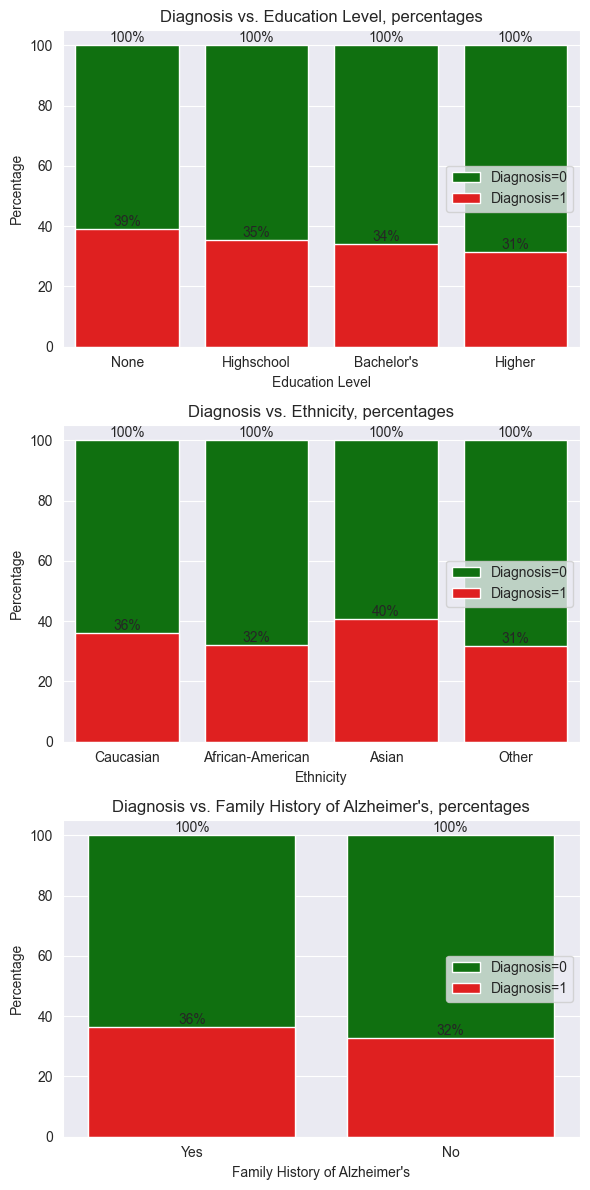

In [40]:
def plot_diagnosis_vs_category(ax, df, category_name):
    sns.barplot(x=df.index, y='Total, %', data=df, color='green', label='Diagnosis=0', ax=ax, ci=None)
    sns.barplot(x=df.index, y='Diagnosis, %', data=df, color='red', label='Diagnosis=1', ax=ax, ci=None)
    ax.set_title(f"Diagnosis vs. {category_name}, percentages")
    ax.set_xlabel(category_name)
    ax.set_ylabel('Percentage')
    ax.legend()
    for container in ax.containers:
        labels = [f'{int(v.get_height())}%' for v in container]
        ax.bar_label(container, labels=labels, label_type='edge')

fig, axs = plt.subplots(3, 1, figsize=(6, 12))  # Adjust figure size to fit the bars better

plot_diagnosis_vs_category(axs[0], df_educ, "Education Level")
plot_diagnosis_vs_category(axs[1], df_ethn, "Ethnicity")
plot_diagnosis_vs_category(axs[2], df_famh, "Family History of Alzheimer's")
plt.tight_layout()
plt.show()

Hasta ahora, podemos confirmar algunos de los puntos previamente mencionados:

El gráfico circular de edades sugiere que la mayor proporción de pacientes se encuentra en el grupo de edad de 80-90 años.
La distribución por género está equilibrada.
En términos de etnicidad, los pacientes caucásicos son los más prevalentes.
Los niveles educativos más comunes son la escuela secundaria, seguida de los títulos de licenciatura.
Verifica la distribución de pacientes diagnosticados con AD según 'NivelEducativo', 'Etnicidad' e 'HistorialFamiliarAlzheimer' (Cuando 'Diagnóstico=1').
Suposiciones (Hipótesis)

Cuando los síntomas aparecen después de los 60 años, implica AD de inicio tardío, que es la forma más común de la enfermedad. El historial familiar de demencia es un factor de riesgo conocido para desarrollar AD de inicio tardío. Por lo tanto, espero que el historial familiar sea un factor que contribuya al AD. Por lo tanto, podría estar altamente correlacionado positivamente con los casos positivos de AD. ¿Es eso cierto, dado el conjunto de datos?

¿El nivel educativo afecta al AD?

Verificar estos hallazgos estadísticamente con la prueba de chi-cuadrado

In [41]:
import scipy.stats as stats

def calculate_chi_square(data, description):
    # Calculate the 'Not' column
    data['Not'] = data['Total'] - data['Diagnosis']
    
    # Create the observed values array
    observed = np.array(data[['Diagnosis', 'Not']].values)
    
    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(observed)
    
    # Print the p-value with the description
    print(f"{description} p-value: {round(p,3)}")

calculate_chi_square(df_educ, 'EducationLevel')
calculate_chi_square(df_ethn, 'Ethnicity')
calculate_chi_square(df_famh, 'FamilyHistoryAlzheimers')


EducationLevel p-value: 0.217
Ethnicity p-value: 0.098
FamilyHistoryAlzheimers p-value: 0.141


Resumen de la prueba de chi-cuadrado:

La hipótesis nula (H₀): No hay una asociación significativa entre las dos variables categóricas que se están probando.

p-valor de 0.217: Este p-valor es mayor que 0.05, lo que significa que no hay evidencia sólida para sugerir que el Nivel Educativo y el Diagnóstico estén relacionados. En otras palabras, el nivel educativo no afecta significativamente la probabilidad de tener un diagnóstico según estos datos.

💥 p-valor de 0.098 💥: Este p-valor es mayor que el nivel alfa de 0.05 pero menor que 0.10. Esto sugiere que hay una débil evidencia en contra de la hipótesis nula, lo que implica que podría haber alguna asociación entre Etnicidad y Diagnóstico.

p-valor de 0.141: Similar a la Etnicidad, este p-valor sugiere que hay una débil asociación entre el Historial Familiar de Alzheimer y el Diagnóstico, pero no es significativa en el umbral usual de 0.05.

Conclusión:

Todos los p-valores son superiores a 0.05, por lo que no hay evidencia sólida para sugerir una relación significativa entre estos factores y el diagnóstico en nuestro conjunto de datos.

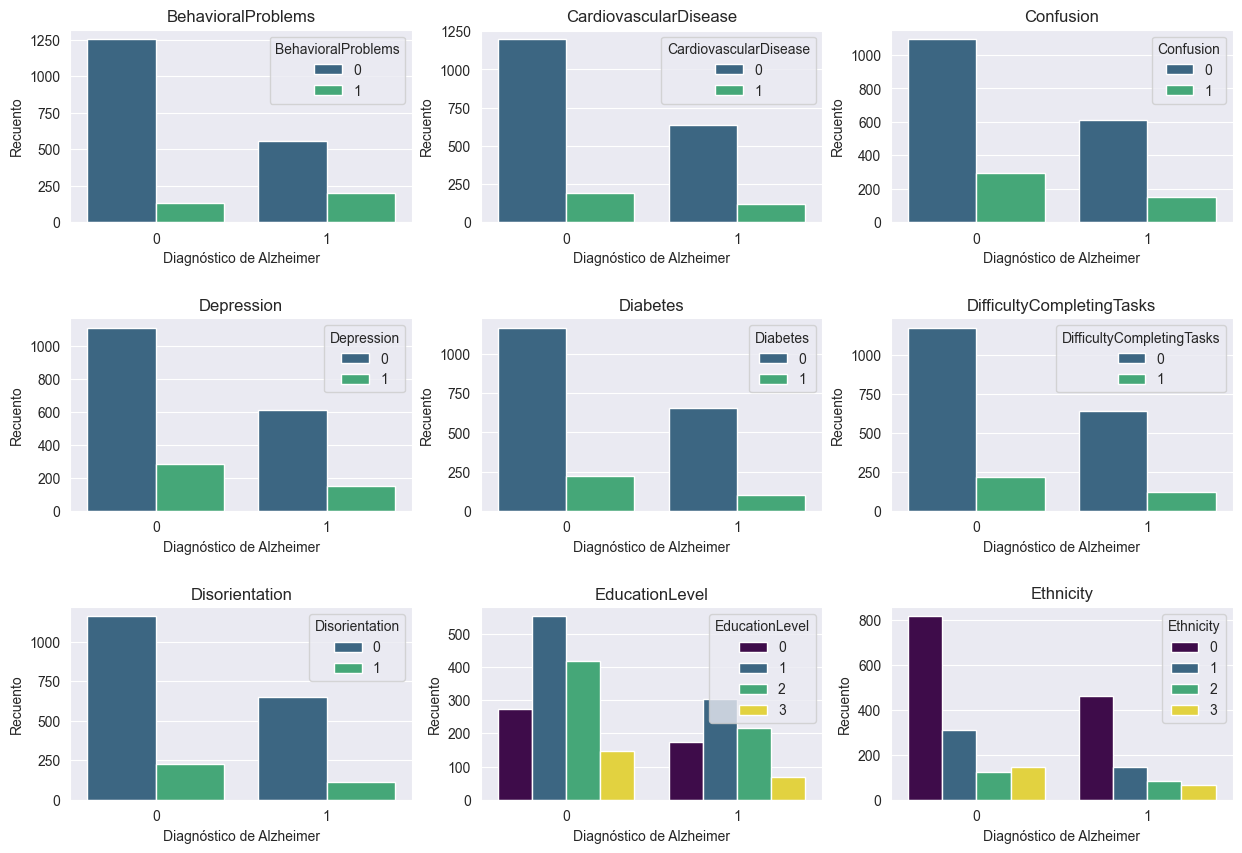

<Figure size 640x480 with 0 Axes>

In [32]:
# Crear un subplot por cada variable continua
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

for i, var in enumerate(categorical_columns):
    if i < 9:
        row = i // 3
        col = i % 3
        sns.countplot(data=df, x='Diagnosis', hue=var, palette='viridis', ax=axes[row, col])
        axes[row, col].set_title(var)
        axes[row, col].set_xlabel('Diagnóstico de Alzheimer')
        axes[row, col].set_ylabel('Recuento')
    else:
        break

plt.subplots_adjust(hspace=0.5)
plt.show()
plt.savefig('countplot.png')


Análisis de correlaciones

In [33]:
# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
Age,1.000000,0.028708,0.027745,-0.060560,-0.015677,0.020060,0.007323,-0.010249,-0.023386,0.049139,...,0.005508,0.012343,0.038973,-0.038658,0.009002,0.027523,-0.009470,0.013900,-0.019279,-0.005488
Gender,0.028708,1.000000,-0.003660,-0.007070,0.005928,0.016650,0.004330,-0.035795,0.010942,0.007310,...,0.033324,0.003880,0.006099,0.003865,-0.030583,0.017506,0.025919,-0.001636,-0.028537,-0.020975
Ethnicity,0.027745,-0.003660,1.000000,0.026516,-0.003176,0.031485,0.008363,0.020498,-0.018184,0.029304,...,-0.004704,0.003687,-0.019363,0.010475,0.022431,-0.018132,-0.030035,0.019363,-0.034619,-0.014782
EducationLevel,-0.060560,-0.007070,0.026516,1.000000,-0.023514,-0.009904,-0.012646,-0.016703,0.017412,0.020248,...,0.020269,-0.000165,0.010473,0.031934,-0.008168,-0.017568,-0.019950,0.013033,-0.008685,-0.043966
BMI,-0.015677,0.005928,-0.003176,-0.023514,1.000000,0.020437,-0.008997,0.000742,0.019922,-0.005975,...,-0.030501,0.029293,0.035276,-0.009788,-0.015859,-0.031840,-0.015901,-0.039400,0.071131,0.026343
Smoking,0.020060,0.016650,0.031485,-0.009904,0.020437,1.000000,0.008363,0.010760,-0.002048,-0.001145,...,-0.031879,0.020339,-0.014763,-0.029233,0.004498,-0.028403,-0.009977,0.001741,0.018011,-0.004865
AlcoholConsumption,0.007323,0.004330,0.008363,-0.012646,-0.008997,0.008363,1.000000,0.021696,0.020117,-0.003873,...,-0.016483,-0.029418,0.013657,-0.008250,-0.032798,0.015521,0.019117,-0.002712,-0.024121,-0.007618
PhysicalActivity,-0.010249,-0.035795,0.020498,-0.016703,0.000742,0.010760,0.021696,1.000000,0.011085,-0.001823,...,-0.002419,0.008709,-0.014253,-0.013324,-0.009397,-0.020407,-0.013629,0.031169,0.009837,0.005945
DietQuality,-0.023386,0.010942,-0.018184,0.017412,0.019922,-0.002048,0.020117,0.011085,1.000000,0.051295,...,-0.009700,0.012537,-0.014033,-0.007888,0.002628,-0.026271,0.029087,0.045737,0.006175,0.008506
SleepQuality,0.049139,0.007310,0.029304,0.020248,-0.005975,-0.001145,-0.003873,-0.001823,0.051295,1.000000,...,0.029589,-0.016807,-0.019899,0.014535,0.013508,0.019467,-0.016892,0.011237,0.002930,-0.056548


Correlaciones Explicadas:

El mapa de calor sugiere que las características no tienen correlaciones fuertes entre sí. Sin embargo, 5 columnas muestran alguna correlación con la variable objetivo. Estas características son:

MMSE
Evaluación Funcional
Quejas de Memoria
Problemas de Comportamiento
ADL

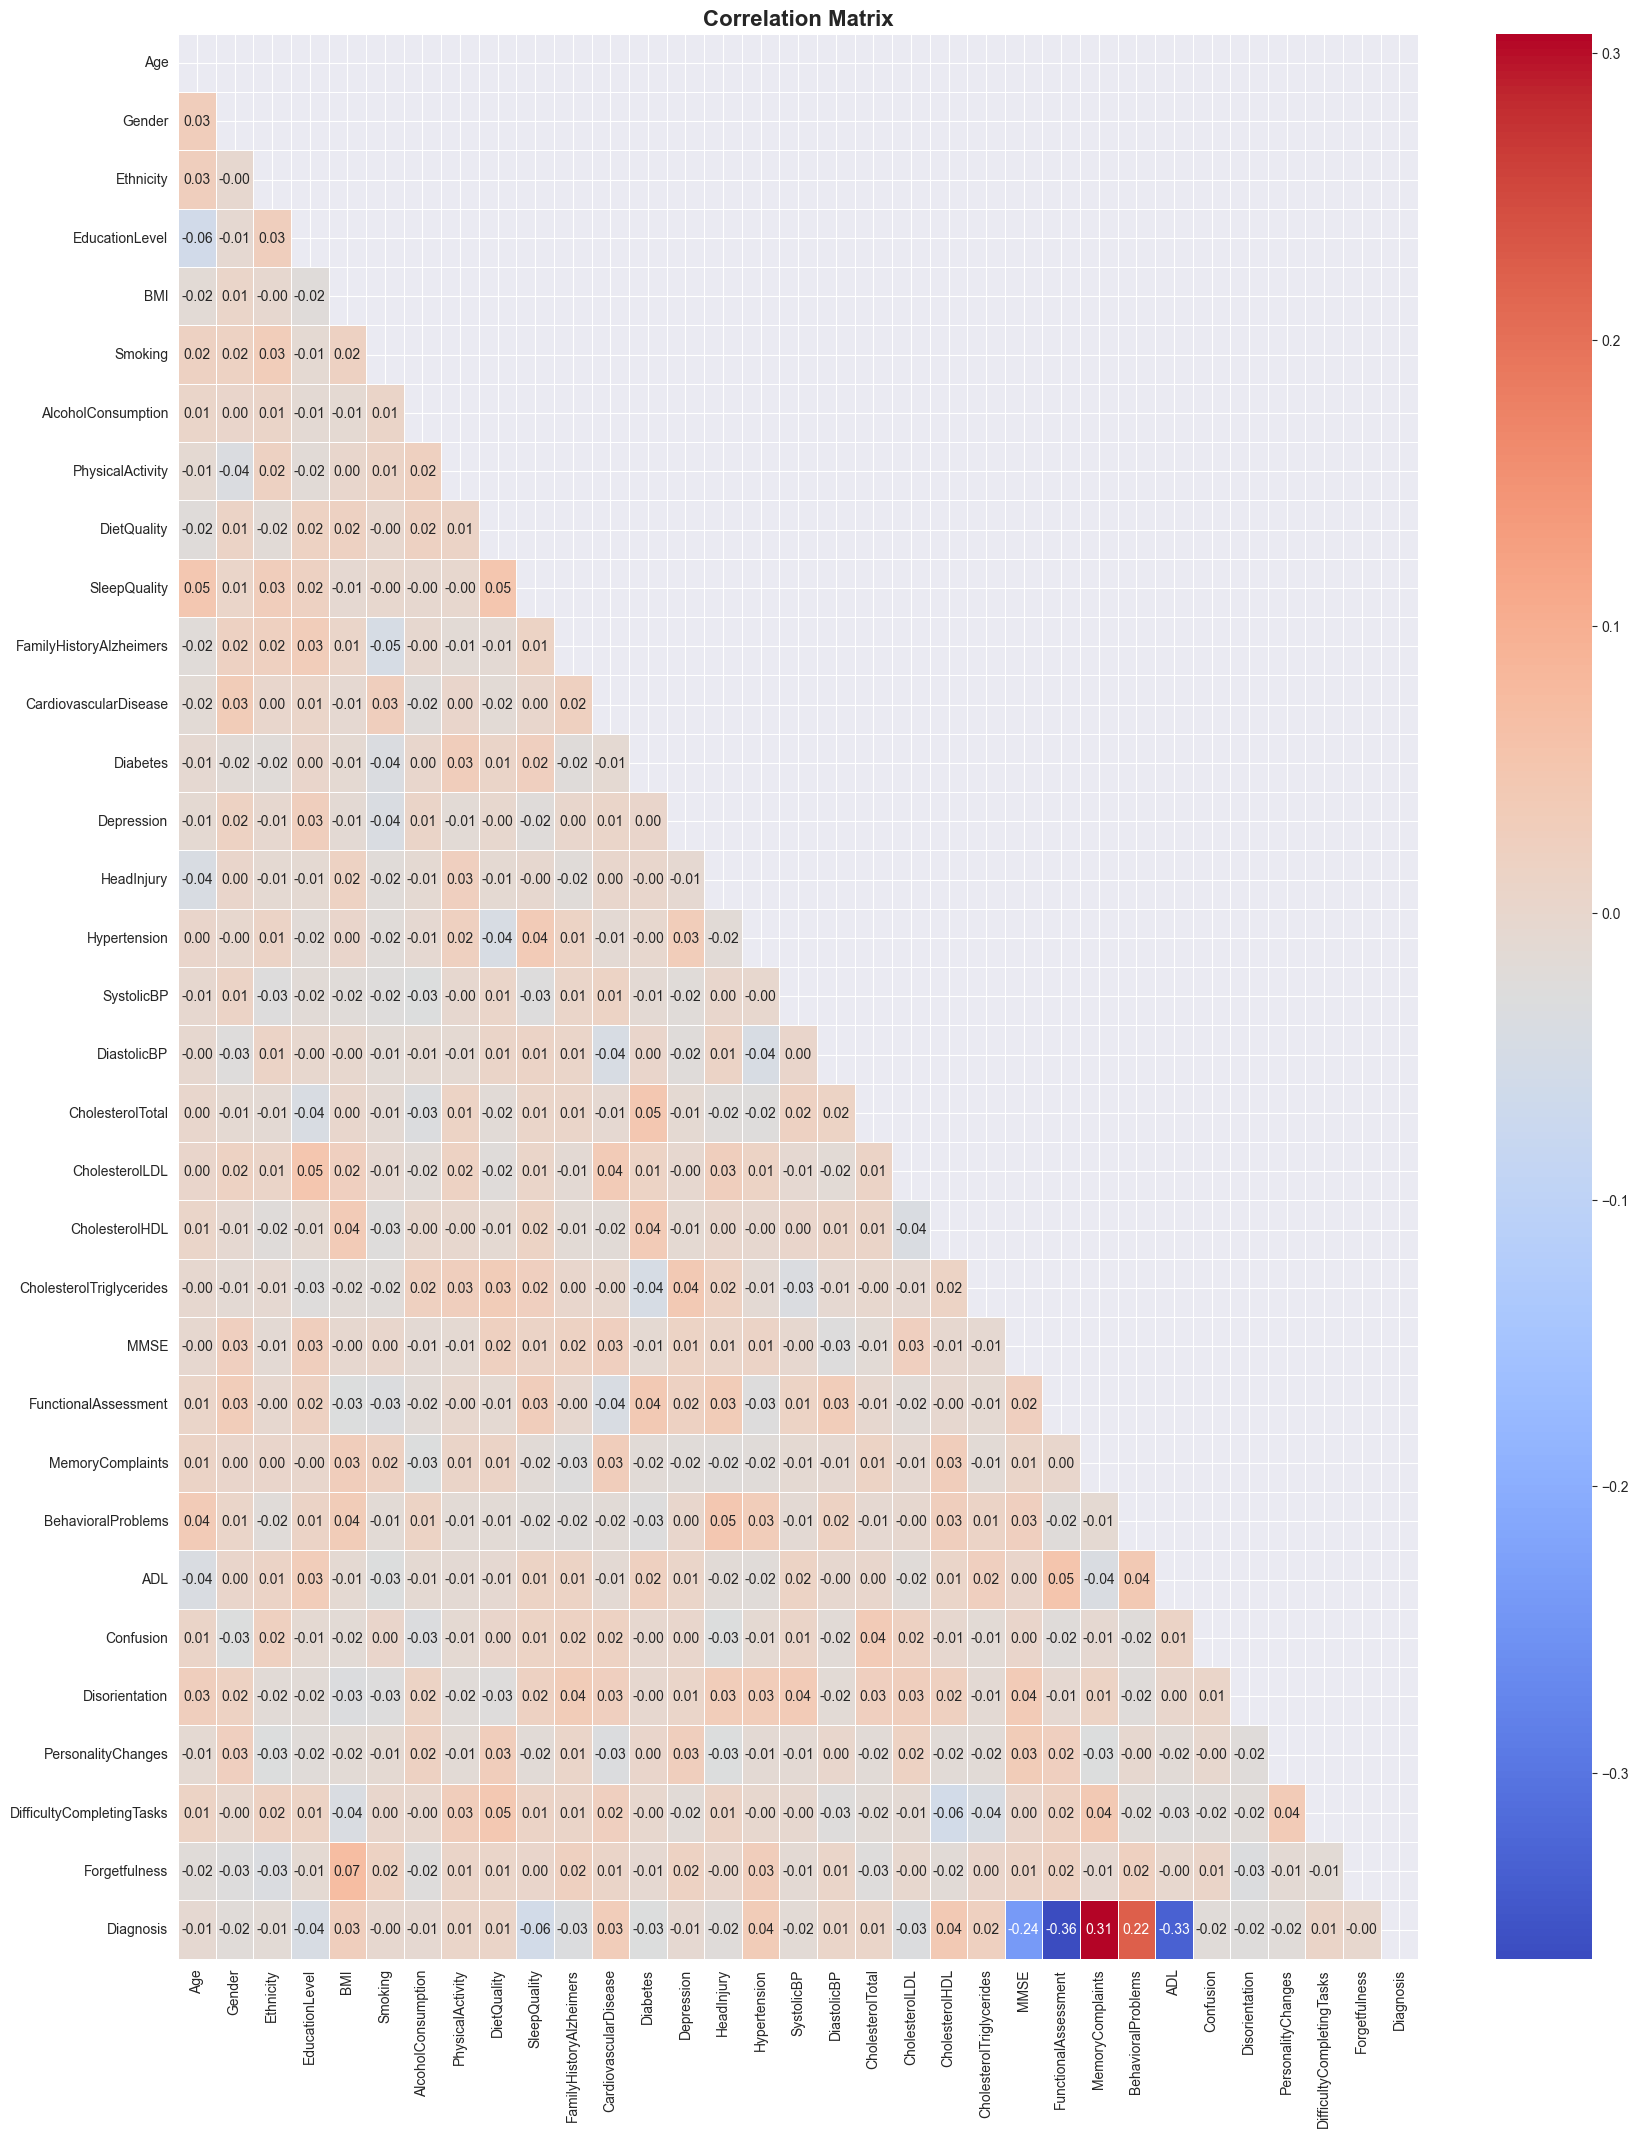

<Figure size 640x480 with 0 Axes>

In [34]:
# Mask for the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Plot the heatmap showing only the diagonal and upper triangle
plt.figure(figsize=(20, 25))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix', fontsize=16, weight='bold')
plt.show()
plt.savefig('heatmap.png')

Correlaciones Explicadas:

El mapa de calor sugiere que las características no tienen correlaciones fuertes entre sí. Sin embargo, 5 columnas muestran alguna correlación con la variable objetivo. Estas características son:

MMSE
Evaluación Funcional
Quejas de Memoria
Problemas de Comportamiento
ADL

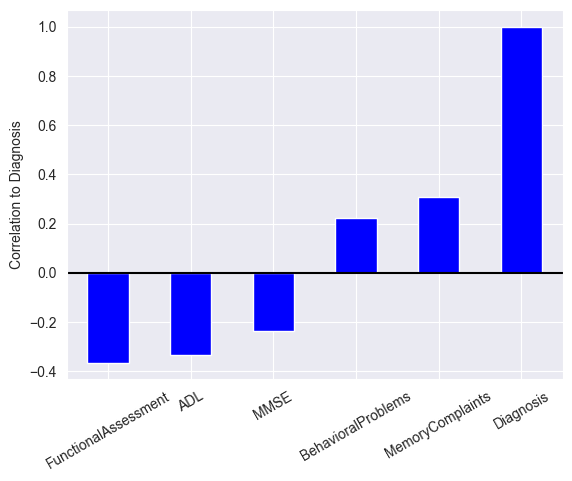

In [42]:
corr_matrix=df.corr()['Diagnosis']
heatcol=df.columns[corr_matrix.abs() > 0.1]
df[heatcol].corr()['Diagnosis'].sort_values().plot(kind='bar',color='blue')
plt.axhline(0, color="k")
plt.ylabel('Correlation to Diagnosis')
plt.xticks( rotation=30)
plt.show()

Correlaciones Explicadas (2):

Como se observa, hay cinco columnas correlacionadas con la variable objetivo.

Tres características numéricas: Evaluación Funcional, ADL (Actividades de la Vida Diaria) y MMSE (Examen del Estado Mental Mini) están negativamente correlacionadas con el diagnóstico de la enfermedad de Alzheimer. Esto indica que puntuaciones más bajas en estas evaluaciones están asociadas con una mayor probabilidad de padecer Alzheimer. Dos variables categóricas: Problemas de Comportamiento y Quejas de Memoria están positivamente correlacionadas con el diagnóstico. Esto significa que la presencia de estos problemas está asociada con una mayor probabilidad de un diagnóstico de Alzheimer, destacando su importancia en el proceso diagnóstico.


#### Preprocesamiento de datos
Escalar datos: normalizar y estandarizar características numéricas

In [45]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize numerical features
min_max_scaler = MinMaxScaler()
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Standardize numerical features
standard_scaler = StandardScaler()
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])

df.to_csv('../data/processed/alzheimer_proc.csv')

In [46]:
df

,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,SleepQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,-0.212368,0,0,2,-0.655225,0,0.565923,0.492525,-1.253593,1.119918,...,0.497506,0,0,-1.104434,0,0,0,1,0,0
1,1.567757,0,0,0,-0.114751,0,-0.954895,0.945093,-1.538442,0.056836,...,0.704907,0,0,-0.810601,0,0,0,0,1,0
2,-0.212368,0,3,1,-1.366428,0,1.653006,1.023896,-1.088855,1.487380,...,0.281813,0,0,0.724491,0,1,0,1,0,0
3,-0.101111,1,0,1,0.851625,1,0.376930,1.227995,0.839804,0.760833,...,1.343346,0,1,0.508044,0,0,0,0,0,0
4,1.567757,0,0,0,-0.961607,0,1.461793,0.486696,-1.443293,-0.824566,...,0.333665,0,0,-1.684679,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2144,-1.547463,0,0,1,1.589030,0,-1.472807,-0.304649,0.537127,0.274767,...,-1.674022,0,0,-0.166194,1,0,0,0,0,1
2145,0.010147,0,0,2,-1.357833,0,1.516149,-1.246106,-0.718090,0.853112,...,1.247350,0,1,1.431627,0,0,0,0,0,1
2146,0.232663,0,0,1,-1.687864,0,-0.945836,1.738405,1.075131,-0.726886,...,-1.074634,0,0,0.018099,0,0,0,0,0,1
2147,0.343921,1,3,1,-1.712334,0,-0.237109,0.502036,-1.282402,0.721313,...,0.032446,0,0,-0.406078,0,0,0,0,1,1
